In [9]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("pokemon_transformed_data.xlsx")
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evol_num,next_evol_name,prev_evol_num,prev_evol_name
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,1.58,"Fire,Ice,Flying,Psychic",3.0,Venusaur,NaN,NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2,1.6","Fire,Ice,Flying,Psychic",3.0,Venusaur,1.0,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire,Ice,Flying,Psychic",NaN,NaN,2.0,Ivysaur
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water,Ground,Rock",6.0,Charizard,NaN,NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water,Ground,Rock",6.0,Charizard,4.0,Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83,1.84","Ice,Dragon,Fairy",149.0,Dragonite,NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice,Dragon,Fairy",149.0,Dragonite,147.0,Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice,Rock,Dragon,Fairy",NaN,NaN,148.0,Dragonair
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug,Ghost,Dark",NaN,NaN,NaN,NaN


In [3]:
# Get all Pokemons whose spawn rate is less than 5%
five_perc = df["spawn_chance"].quantile(0.05)
df[df["spawn_chance"] < five_perc]["name"]

131        Ditto
143     Articuno
144       Zapdos
145      Moltres
148    Dragonite
149       Mewtwo
150          Mew
Name: name, dtype: object

In [4]:
# Get all Pokemons that have less than 4 weaknesses
 
for i in range(df.shape[0]):
    df["weaknesses"][i] = df["weaknesses"][i].split(",")
    
df[df["weaknesses"].apply(len) < 4]


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evol_num,next_evol_name,prev_evol_num,prev_evol_name
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"[Water, Ground, Rock]",6.0,Charizard,NaN,NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"[Water, Ground, Rock]",6.0,Charizard,4.0,Charmander
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire,Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"[Water, Electric, Rock]",NaN,NaN,5.0,Charmeleon
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,2.1,"[Electric, Grass]",9.0,Blastoise,NaN,NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,1.4,"[Electric, Grass]",9.0,Blastoise,7.0,Squirtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire,Flying",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Water, Electric, Rock]",NaN,NaN,NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83,1.84","[Ice, Dragon, Fairy]",149.0,Dragonite,NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"[Ice, Dragon, Fairy]",149.0,Dragonite,147.0,Dratini
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"[Bug, Ghost, Dark]",NaN,NaN,NaN,NaN


In [5]:
# Get all Pokemons that have no multipliers at all
df[df["multipliers"].isna()]["name"]

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

In [6]:
#Get all Pokemons whose spawn time is less than 300 seconds.

df["spawn_time_less_then_300"] = df["spawn_time"].dropna().apply(lambda x: (int(x.split(":")[0]) * 60) +(int(x.split(":")[1]))) < 300

df.loc[df["spawn_time_less_then_300"] == True]["name"]

6       Squirtle
8      Blastoise
10       Metapod
12        Weedle
13        Kakuna
         ...    
127       Tauros
129     Gyarados
134      Jolteon
136      Porygon
139       Kabuto
Name: name, Length: 75, dtype: object

In [7]:
#Get all Pokemon who have more than two types of capabilities
df[df["type"].apply(lambda x: len(x.split(","))) > 2]

#Below we can clearly observe that there are is no Pokemon having capabilities more than 2

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evol_num,next_evol_name,prev_evol_num,prev_evol_name,spawn_time_less_then_300


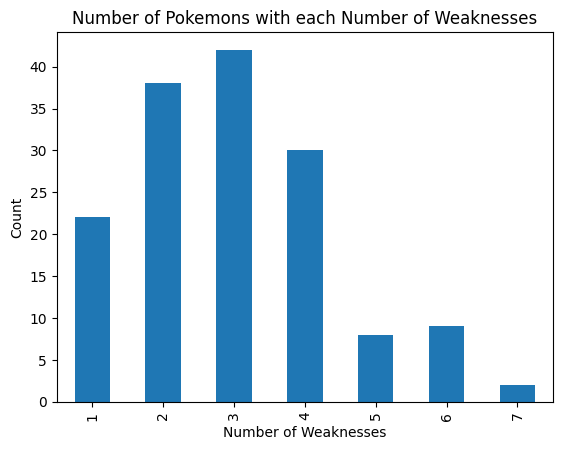

In [10]:
# Plotting

# Bar chart: Number of Pokemons with each number of weaknesses
weaknesses_count = df['weaknesses'].apply(len)
weaknesses_count.value_counts().sort_index().plot(kind='bar', xlabel='Number of Weaknesses', ylabel='Count')
plt.title('Number of Pokemons with each Number of Weaknesses')
plt.show()

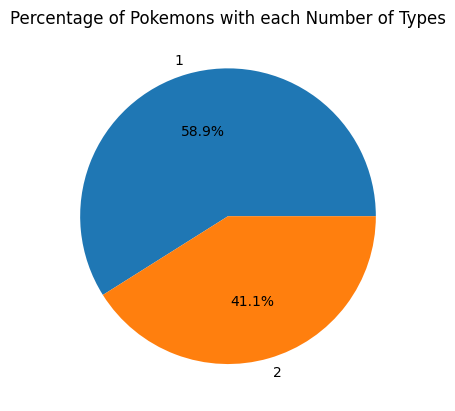

In [11]:
# Pie chart: Percentage of Pokemons with each type of capability

type_count = df['type'].apply(lambda x: len(x.split(",")))
type_count.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Pokemons with each Number of Types')
plt.ylabel('')
plt.show()